In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import torchvision
from tqdm.notebook import tqdm
import os
import sys

## Custom Imports

In [2]:
os.chdir("../fashion_ml")

In [3]:
from fashion_vae import FashionVAE
from data_loader import EZ_Dataloader
from experiment import FashionML

## Build Data Loader

In [4]:
dl = EZ_Dataloader("FashionMNIST")

In [5]:
dl.build_train_test_loader()

In [6]:
dl.build_val_loader()

## Build VAE

In [7]:
t = dl.train_loader.dataset

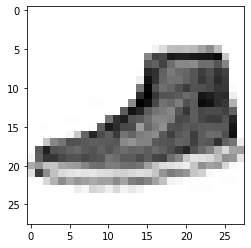

In [8]:
import matplotlib.pyplot as plt
a = t[12342][0]
plt.imshow(torch.squeeze(a), cmap = "Greys")

In [9]:
fvae = FashionVAE(h_dims = [32,32,64], latent_dim = 2)

In [10]:
fvae

FashionVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (fc_mu): Linear(in_features=3136, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=3136, out_features=10, bias=True)
  (decoder_latent_space): Sequential(
    (0): Linear(in_features=10, out_features=3136, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), output_paddi

In [11]:
fvae = fvae.cuda()
res = fvae.forward(torch.unsqueeze(a,0).cuda())

In [12]:
res[0].shape

torch.Size([1, 1, 28, 28])

In [13]:
adam = torch.optim.Adam

In [14]:
fml = FashionML(fvae, dl, adam)

In [15]:
fml.epochs = 20

In [16]:
fml.fit()

Validation Loss: 17.548444747924805
Reconstruction Loss: 13.556385040283203
KLD Loss: 3.9920618534088135
-----------------------------------------------------------------------------------------------------------------------------
Validation Loss: 16.433591842651367
Reconstruction Loss: 11.312176704406738
KLD Loss: 5.121415615081787
-----------------------------------------------------------------------------------------------------------------------------
Validation Loss: 16.364391326904297
Reconstruction Loss: 11.5552396774292
KLD Loss: 4.809150218963623
-----------------------------------------------------------------------------------------------------------------------------
Validation Loss: 15.987147331237793
Reconstruction Loss: 10.812979698181152
KLD Loss: 5.174165725708008
-----------------------------------------------------------------------------------------------------------------------------
Validation Loss: 15.910201072692871
Reconstruction Loss: 10.975635528564453
KLD L

KeyboardInterrupt: 

In [24]:
fvae = fvae.cuda()
latent, t = fvae.sample(1, include_locations= True)

print(latent)

tensor([[ 1.5605, -1.3669]])


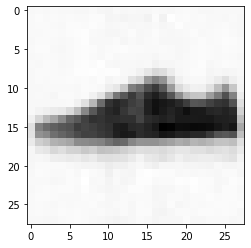

In [25]:
plt.imshow(torch.squeeze(t.detach().cpu()), cmap = "Greys")

In [22]:
import os
print(os.getcwd())

/home/showalte/classes/2020-21/Fall/CS273-Machine-Learning/CS273_Final_Project_VAE/fashion_ml


In [24]:
torch.save(fml.model.state_dict(), "../models/20_epoch_VAE_model.pt")

In [18]:
img = []
for i in range(20):
    i1 = (i-10)/2
    row = []
    for j in range(20):
        i2 = (j-10)/2
        
        row.append(torch.squeeze(fml.model.sample_latent((i1,i2))))
    
    img.append(torch.cat(row, axis = 1))

img = torch.cat(img, axis = 0)

In [19]:
img.shape

torch.Size([560, 560])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

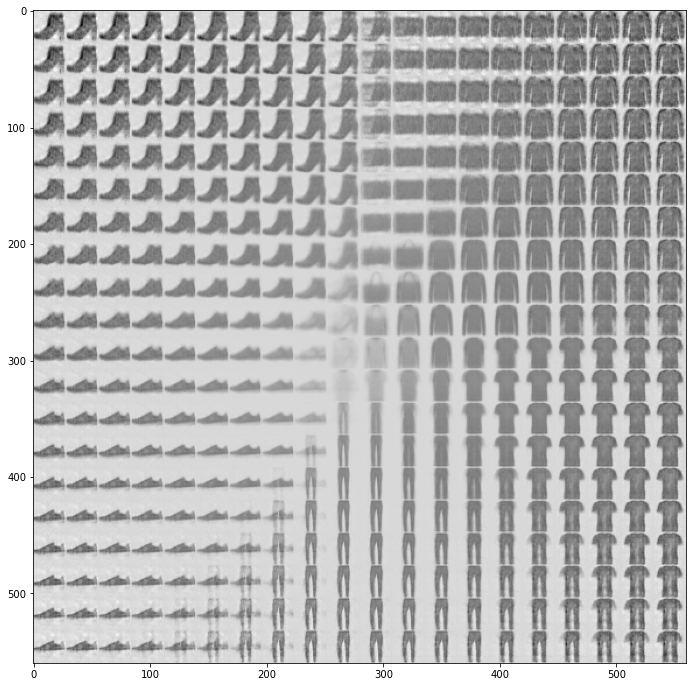

In [48]:
plt.figure(figsize = (12,12))
plt.imshow(img, cmap='Greys')
plt.axes("off")

In [10]:
fvae.load_state_dict(torch.load("../models/20_epoch_2ld_VAE_model.pt"))

<All keys matched successfully>

In [ ]:
plt.imshow(torch.squeeze(fvae.sample(1).detach().cpu()), cmap = "Greys");